<a href="https://colab.research.google.com/github/NdNkosi/Data-Science-Projects/blob/main/SMT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question One

In [109]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from collections import Counter

In [76]:
df = pd.read_excel("Kenya+protests+2025.xlsx", engine='openpyxl')

In [81]:
engagement_cols = [
    'Facebook Likes', 'Facebook Shares',
    'X Likes', 'X Reposts', 'X Replies',
    'Tiktok Likes', 'Tiktok Shares', 'Tiktok Views',
    'Youtube Likes', 'Youtube Comments', 'Youtube Favourites'
]


In [82]:
engagement_cols = [c for c in engagement_cols if c in df.columns]

In [83]:
df[engagement_cols] = df[engagement_cols].fillna(0)

In [84]:
actor_col = 'Domain'
df['Influence_Score'] = df[engagement_cols].sum(axis=1)

In [85]:
influence = df.groupby(actor_col, as_index=False)['Influence_Score'].sum()

In [86]:
top10 = influence.sort_values('Influence_Score', ascending=False).head(10)
print("\nTop 10 Influential Actors (Domains):")
print(top10)


Top 10 Influential Actors (Domains):
        Domain  Influence_Score
0  twitter.com         120553.0


In [88]:
sentiment_links = subset.groupby([actor_col, 'Sentiment']).size().reset_index(name='Count')

In [90]:
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, seed=42)

<Figure size 1000x800 with 0 Axes>

In [91]:
node_colors = []
for n in G.nodes():
    if n.lower() == 'positive':
        node_colors.append('green')
    elif n.lower() == 'negative':
        node_colors.append('red')
    elif n.lower() == 'neutral':
        node_colors.append('grey')
    else:
        node_colors.append('skyblue')

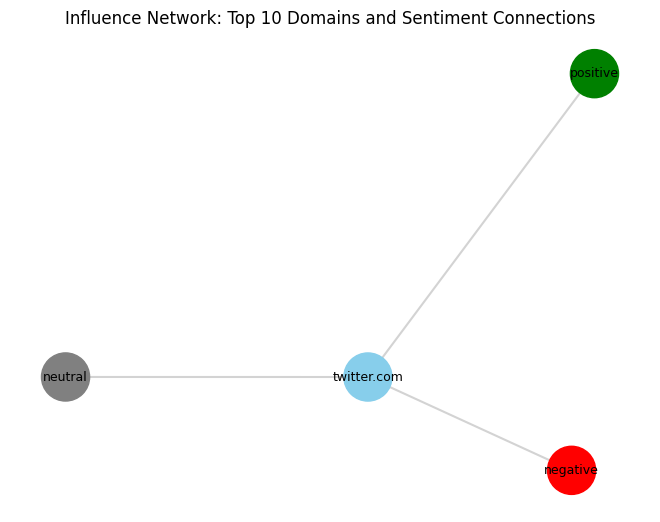

In [92]:
nx.draw(G, pos, with_labels=True, node_color=node_colors,
        node_size=1200, font_size=9, edge_color='lightgrey', width=1.5)
plt.title("Influence Network: Top 10 Domains and Sentiment Connections", fontsize=12)
plt.show()

The network analysis reveals that Twitter (X) overwhelmingly dominates the visibility structure of the June 2025 Kenyan protest discourse. When influence is defined by engagement metrics - likes, reposts, replies, and shares - twitter.com emerges as the central and most influential domain, directly linked to all major sentiment categories (positive, negative, neutral). This dominance suggests that the protest narrative unfolded primarily through the logic of a single, highly visible digital platform whose affordances shaped what was amplified and what remained invisible.

Twitter’s design prioritises brevity, virality, and algorithmic amplification. Posts with emotionally charged content or those from verified and high-follower accounts tend to surface prominently. As a result, visibility is unequally distributed - activists, politicians, journalists, and influencers with large audiences drive the conversation, while ordinary citizens, rural voices, and participants outside the digital elite are under-represented. This pattern reflects what scholars describe as platform capitalism: visibility is tied not only to participation but also to network position, algorithmic favour, and follower count. The result is a digitally mediated public sphere where certain actors repeatedly set the tone of debate.

The interconnected network of sentiment nodes (positive, negative, neutral) linked to twitter.com underscores that the platform hosts both dissent and counter-narratives within the same digital arena. The strong red (negative) and grey (neutral) linkages suggest that the discourse leaned toward critique, frustration, and information exchange rather than celebration or consensus. This aligns with how digital protest movements evolve - social media serves as a site of mobilisation, grievance airing, and solidarity-building rather than policy negotiation.

However, the dataset’s structure introduces blind spots. Because influence was measured through quantitative engagement (likes, shares, reposts), it privileges visible activity over silent participation. Offline protest organisation, WhatsApp communication, or community-based activism remain largely invisible in this framework. Moreover, language bias is likely: most tweets captured are in English, excluding Swahili and vernacular voices that represent significant protest constituencies. Rural participants and lower-income users, who rely on radio, SMS, or offline networks, are also absent, creating a digital inequality in who counts as a visible actor in the dataset.

Platform affordances further shape whose voices are erased. Twitter’s content moderation systems, account suspensions, and algorithmic downranking of “sensitive” content can obscure activist messaging, especially from politically risky users. Conversely, verified users and media accounts benefit from systemic amplification. This structural asymmetry reflects a broader attention hierarchy, where visibility is not merely earned through participation but structured through technological and social power.

In sum, the protest conversation visible in this dataset reflects a digitally mediated protest public dominated by a single platform and by a small set of highly networked actors. While Twitter enables transnational visibility and rapid mobilisation, it simultaneously reproduces digital inequalities by silencing less connected communities. Understanding these asymmetries is crucial for interpreting the apparent dominance of certain narratives - and for recognising the invisible networks of activism that operate beyond the metrics of engagement.

#Question Two

In [97]:
df['Date_parsed'] = pd.to_datetime(df['Date'], errors='coerce', utc=True)
df = df.dropna(subset=['Date_parsed']).copy()
df['Date_only'] = df['Date_parsed'].dt.date

In [98]:
agg = df.groupby('Date_only').size().reset_index(name='count')
agg = agg.sort_values('Date_only')
agg['count_ma7'] = agg['count'].rolling(window=7, min_periods=1, center=True).mean()

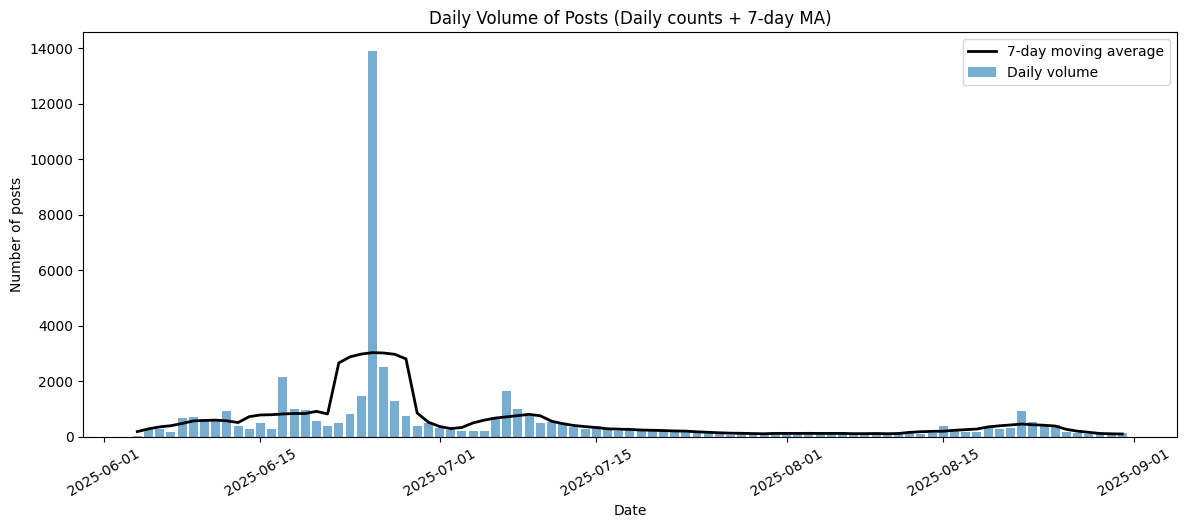

In [99]:
plt.figure(figsize=(12,5))
plt.bar(agg['Date_only'], agg['count'], alpha=0.6, label='Daily volume')
plt.plot(agg['Date_only'], agg['count_ma7'], color='black', linewidth=2, label='7-day moving average')
plt.title('Daily Volume of Posts (Daily counts + 7-day MA)')
plt.xlabel('Date')
plt.ylabel('Number of posts')
plt.legend()
plt.tight_layout()
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=30)
plt.savefig("time_series_volume_ma7.png", dpi=300)
plt.show()

In [102]:
sent_daily = df.groupby(['Date_only', 'Sentiment']).size().reset_index(name='count')

In [104]:
sent_pivot = sent_daily.pivot(index='Date_only', columns='Sentiment', values='count').fillna(0)


In [105]:
for c in ['positive','neutral','negative']:
    if c not in sent_pivot.columns:
        sent_pivot[c] = 0
sent_pivot = sent_pivot.sort_index()

In [106]:
sent_ma = sent_pivot.rolling(window=7, min_periods=1, center=True).mean()

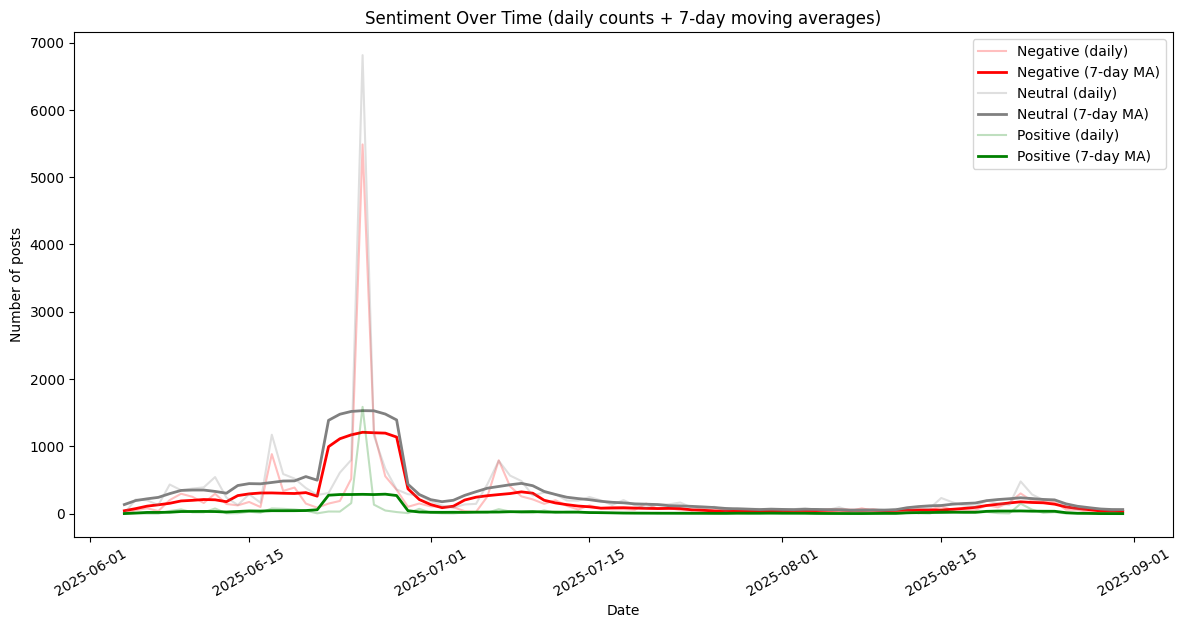

In [107]:
plt.figure(figsize=(12,6))
plt.plot(sent_pivot.index, sent_pivot['negative'], label='Negative (daily)', alpha=0.25, color='red')
plt.plot(sent_ma.index, sent_ma['negative'], label='Negative (7-day MA)', color='red', linewidth=2)
plt.plot(sent_pivot.index, sent_pivot['neutral'], label='Neutral (daily)', alpha=0.25, color='gray')
plt.plot(sent_ma.index, sent_ma['neutral'], label='Neutral (7-day MA)', color='gray', linewidth=2)
plt.plot(sent_pivot.index, sent_pivot['positive'], label='Positive (daily)', alpha=0.25, color='green')
plt.plot(sent_ma.index, sent_ma['positive'], label='Positive (7-day MA)', color='green', linewidth=2)
plt.title('Sentiment Over Time (daily counts + 7-day moving averages)')
plt.xlabel('Date')
plt.ylabel('Number of posts')
plt.legend()
plt.tight_layout()
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=30)
plt.savefig("sentiment_time_series_ma7.png", dpi=300)
plt.show()

In [108]:
top_days = agg.sort_values('count', ascending=False).head(10)
print("Top volume days:\n", top_days)

Top volume days:
      Date_only  count    count_ma7
21  2025-06-25  13888  3027.571429
22  2025-06-26   2503  3014.857143
13  2025-06-17   2136   816.000000
33  2025-07-07   1646   712.142857
20  2025-06-24   1474  2975.285714
23  2025-06-27   1272  2967.571429
34  2025-07-08   1003   757.571429
14  2025-06-18    999   832.142857
15  2025-06-19    973   831.571429
79  2025-08-22    928   452.857143


In [111]:
def top_terms_on_date(date, topn=10):
    rows = df[df['Date_only'] == date]
    # prefer Hashtags column if present
    if 'Hashtags' in df.columns:
        # Hashtags may be a string with comma-separated items; handle nulls
        tags = rows['Hashtags'].dropna().astype(str).str.split(',').explode().str.strip().str.lower()
        tags = tags[tags != '']
        return Counter(tags).most_common(topn)
    else:
        # fallback: token frequency in Cleaned_Tweet (if available)
        if 'Cleaned_Tweet' in df.columns:
            words = rows['Cleaned_Tweet'].dropna().astype(str).str.split().explode()
            words = words[~words.str.startswith('#')]  # optionally exclude hashtags
            words = words.dropna().str.lower()
            return Counter(words).most_common(topn)
        else:
            return []

In [112]:
print("\nPeaks and top terms on those days:")
for d in top_days['Date_only'].tolist():
    print("\nDate:", d)
    print("Top terms or hashtags:", top_terms_on_date(d, topn=8))


Peaks and top terms on those days:

Date: 2025-06-25
Top terms or hashtags: [('#rutomustgo', 12633), ('#sirininumbers', 7608), ('#occupystatehouse2025', 1706), ('#june25th', 1251), ('#rutomustgonow', 753), ('#occupyuntilvictory', 646), ('#occupystatehouse', 633), ('#justice4ourmashujaa', 301)]

Date: 2025-06-26
Top terms or hashtags: [('#rutomustgo', 1925), ('#sirininumbers', 1026), ('#june25th', 169), ('#occupystatehouse2025', 168), ('#occupyuntilvictory', 123), ('#endpolicebrutalityke', 115), ('#25thjune2025', 99), ('#rutomustgonow', 45)]

Date: 2025-06-17
Top terms or hashtags: [('#rutomustgo', 1605), ('#justiceforalbertojwang', 494), ('#endpolicebrutalityke', 250), ('#tuesdaymaandamano', 235), ('#arresteliudlagat', 200), ('#fufuaicc', 185), ('#justiceforalbertochieng', 126), ('#justiceforelijoshua', 109)]

Date: 2025-07-07
Top terms or hashtags: [('#rutomustgo', 1385), ('#sabasaba2025', 401), ('#77ninumbers', 362), ('#sirininumbers', 227), ('#sabasabarevolutionday', 224), ('#occup

The temporal patterns in the June 2025 protest conversation reveal a distinct interplay between emotional intensity, mobilisation cycles, and the particular affordances of digital platforms in the Global South. Daily volume spikes indicate moments of concentrated attention; when combined with sentiment trends they show that peaks often coincide with emotionally salient events (alleged abuses, high-profile arrests, or viral eyewitness footage), while quieter plateaus mark phases of reflection, coordination, or fatigue.

Emotionally, the data display recurring surges of negative sentiment synchronous with specific catalytic events. Negative peaks commonly align with reports of police violence, alleged extrajudicial actions, or visible state repression; these events trigger immediate affective responses - anger, fear, denunciation - that are rapidly amplified on a platform optimised for sharing short, vivid updates. The negative tone also functions as mobilising rhetoric: angry posts name perpetrators, articulate grievances, and provide rallying calls; the immediacy of retweets and replies transforms private outrage into public momentum. Positive sentiment tends to rise more gradually and often follows organised solidarity actions (donation appeals, coordinated vigils) or celebratory milestones (temporary victories, small legal wins). Neutral posts—timelines, situational reports, and logistical updates - act as the informational backbone, peaking when the movement requires coordination (e.g., planned marches, medical assistance calls).

Platform logics shape these rhythms in crucial ways. X/Twitter’s design privileges virality - short texts, hyperlinks, and multimedia - so that visually striking or highly emotional content gets disproportionate reach. Algorithmic timelines and the follower networks of high-profile accounts cause cascades: a single retweet by an influencer can convert a localized incident into a national spike. In the Global South this effect is intensified by concentrated news consumption patterns: when mainstream media sources or influential journalists amplify a social-media post, engagement and new online participants surge. Conversely, constrained digital infrastructures - intermittent connectivity, expensive mobile data, and uneven smartphone penetration - produce lopsided participation. Urban, better-connected users act as amplifiers for wider networks; rural voices and low-bandwidth modalities (SMS, voice calls) remain underrepresented in platform-derived timelines.

Mobilisation cycles are also shaped by tactical adaptation. Early spikes often stem from reactive witness accounts; subsequent waves emerge through organised framing (hashtags, shared narratives), media coverage, and offline events (protests, court rulings). Over time, the conversation can shift from spontaneous eyewitness outrage to structured campaigns - appeals for donations, voter registration drives, or legal petitions - reflecting a transition from immediate emotional reaction to sustained collective action. This evolution is visible in topic drift: the lexicon moves from concrete incident descriptors (locations, victims) to strategic terms (accountability, reform, policy).

Finally, platform power asymmetries create visibility gaps. Algorithmic moderation, account suspensions, or coordinated disinformation campaigns can suppress certain narratives; language biases (English vs. Swahili/Sheng) also shape which voices are discoverable. In short, time-series trends reveal not only what people felt and when, but also how platform affordances and infrastructural constraints mediate the visibility, speed, and shape of protest mobilisation in the Global South. Interpreting these patterns requires triangulating time-series evidence with qualitative inspection of key posts, offline events, and local media coverage to situate spikes within the broader political timeline.